<img src="images/6.png" width="900">

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

### Read the dolphins network
#### http://konect.uni-koblenz.de/networks/dolphins

In [3]:
G = nx.read_edgelist("data/dolphins")

# General network stats

In [4]:
print(len(G.nodes()), len(G.edges()))

62 159


In [5]:
G.nodes()

NodeView(('9', '4', '10', '6', '7', '11', '1', '3', '14', '15', '16', '17', '18', '2', '19', '20', '8', '21', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '13', '35', '36', '37', '24', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '50', '51', '52', '5', '12', '53', '54', '55', '56', '57', '58', '49', '59', '60', '61', '62'))

# Understanding network topology

In [6]:
print("Is dolphin network connected: {}".format(nx.is_connected(G)))
print("Diameter or the longest shortest distance: {}".format(nx.diameter(G)))
print("Average shortest path: {}".format(nx.average_shortest_path_length(G)))

print("Radius or the shortest largest distance: {}\n\n".format(nx.radius(G)))
print("Dolphins found at the periphery of the network: {}".format(", ".join(nx.periphery(G))))
print("Dolphins found in the center of the network: {}".format(", ".join(nx.center(G))))

Is dolphin network connected: True
Diameter or the longest shortest distance: 8
Average shortest path: 3.3569539925965097
Radius or the shortest largest distance: 5


Dolphins found at the periphery of the network: 36, 47, 50, 5, 12, 54, 59, 61
Dolphins found in the center of the network: 2, 20, 8, 28, 29, 31, 37, 40, 41, 55


### **Periphery** - Largest distance == diameter
### **Center** - Largest distance == radius

#### The center dolphins are most likely the ones that kept information flowing between two or more network communities.

# Local clustering coefficient

<img src="images/10.png" width="300">

### https://www.e-education.psu.edu/geog597i_02/node/832

In [65]:
print(nx.average_clustering(G))
pprint(nx.clustering(G))

0.25895824605502027
{'1': 0.3333333333333333,
 '10': 0.5238095238095238,
 '11': 0.4,
 '12': 0,
 '13': 0,
 '14': 0.5,
 '15': 0.25757575757575757,
 '16': 0.23809523809523808,
 '17': 0.6,
 '18': 0.2222222222222222,
 '19': 0.5238095238095238,
 '2': 0.14285714285714285,
 '20': 0.5,
 '21': 0.1388888888888889,
 '22': 0.5333333333333333,
 '23': 0,
 '24': 0.3333333333333333,
 '25': 0.5333333333333333,
 '26': 0.6666666666666666,
 '27': 0.6666666666666666,
 '28': 0.4,
 '29': 0.3,
 '3': 0.16666666666666666,
 '30': 0.25,
 '31': 0.3,
 '32': 0,
 '33': 0.3333333333333333,
 '34': 0.3333333333333333,
 '35': 0.3,
 '36': 0,
 '37': 0.047619047619047616,
 '38': 0.23636363636363636,
 '39': 0.2857142857142857,
 '4': 0.3333333333333333,
 '40': 0,
 '41': 0.25,
 '42': 0.6,
 '43': 0.3333333333333333,
 '44': 0.23809523809523808,
 '45': 0.16666666666666666,
 '46': 0.3090909090909091,
 '47': 0,
 '48': 0.4,
 '49': 0,
 '5': 0,
 '50': 0,
 '51': 0.23809523809523808,
 '52': 0.24444444444444444,
 '53': 0.3333333333333333,

# One lonely dolphin and his friend 

In [60]:
list(G.neighbors('12'))

['52']

# Omega score (Network type: Sparse, Small-word, Random)

In [75]:
from networkx.algorithms import smallworld

smallworld.omega(G, niter=100, nrand=1)

0.1402171694312061

# TRIADS - the open triangles problem

<img src="images/9.png" width="400">

#### https://harangdev.github.io/applied-data-science-with-python/applied-social-network-analysis-in-python/2/
#### https://necromuralist.github.io/data_science/posts/triadic-closure/

### Transitivity
#### Percentage of “open triads” that are triangles in a network

In [127]:
nx.transitivity(G)

0.3087757313109426

In [36]:
from itertools import combinations
 
def is_in_triangle(G, n):
    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
            
    return in_triangle

def get_open_triangles(G, n):
    in_open_triangle = False
    
    open_triangles = list()
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
        if not G.has_edge(n1, n2):
            open_triangles.append([n1, n2])
    
    return open_triangles

In [34]:
for n in sorted(G.nodes()):
    print("Dolphin: {} \n\tis in a triangle: {}".format(n, is_in_triangle(G, n)))

Dolphin: 1 
	is in a triangle: True
Dolphin: 10 
	is in a triangle: True
Dolphin: 11 
	is in a triangle: True
Dolphin: 12 
	is in a triangle: False
Dolphin: 13 
	is in a triangle: False
Dolphin: 14 
	is in a triangle: True
Dolphin: 15 
	is in a triangle: True
Dolphin: 16 
	is in a triangle: True
Dolphin: 17 
	is in a triangle: True
Dolphin: 18 
	is in a triangle: True
Dolphin: 19 
	is in a triangle: True
Dolphin: 2 
	is in a triangle: True
Dolphin: 20 
	is in a triangle: True
Dolphin: 21 
	is in a triangle: True
Dolphin: 22 
	is in a triangle: True
Dolphin: 23 
	is in a triangle: False
Dolphin: 24 
	is in a triangle: True
Dolphin: 25 
	is in a triangle: True
Dolphin: 26 
	is in a triangle: True
Dolphin: 27 
	is in a triangle: True
Dolphin: 28 
	is in a triangle: True
Dolphin: 29 
	is in a triangle: True
Dolphin: 3 
	is in a triangle: True
Dolphin: 30 
	is in a triangle: True
Dolphin: 31 
	is in a triangle: True
Dolphin: 32 
	is in a triangle: False
Dolphin: 33 
	is in a triangle: True


In [126]:
open_triangles_by_node = dict()

for n in sorted(G.nodes()):
    open_triangles = get_open_triangles(G, n)
    open_triangles_by_node[n] = open_triangles
    
    if len(open_triangles) > 0:
        print("Dolphin: {} can create {} new relations.".format(n, len(open_triangles)))

Dolphin: 1 can create 10 new relations.
Dolphin: 10 can create 10 new relations.
Dolphin: 11 can create 6 new relations.
Dolphin: 14 can create 14 new relations.
Dolphin: 15 can create 49 new relations.
Dolphin: 16 can create 16 new relations.
Dolphin: 17 can create 6 new relations.
Dolphin: 18 can create 28 new relations.
Dolphin: 19 can create 10 new relations.
Dolphin: 2 can create 24 new relations.
Dolphin: 20 can create 3 new relations.
Dolphin: 21 can create 31 new relations.
Dolphin: 22 can create 7 new relations.
Dolphin: 24 can create 2 new relations.
Dolphin: 25 can create 7 new relations.
Dolphin: 26 can create 1 new relations.
Dolphin: 27 can create 1 new relations.
Dolphin: 28 can create 6 new relations.
Dolphin: 29 can create 7 new relations.
Dolphin: 3 can create 5 new relations.
Dolphin: 30 can create 27 new relations.
Dolphin: 31 can create 7 new relations.
Dolphin: 33 can create 2 new relations.
Dolphin: 34 can create 30 new relations.
Dolphin: 35 can create 7 new rel

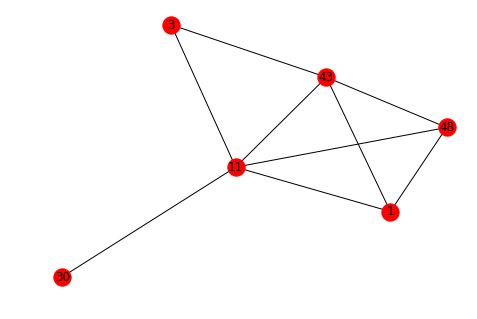

In [52]:
subgraph_nodes = []
test_dolphin = '11'

subgraph_nodes.extend([test_dolphin])
[subgraph_nodes.extend(a) for a in open_triangles_by_node[test_dolphin]]

H = G.subgraph(set(subgraph_nodes))

nx.draw(H, with_labels=True)
plt.show()

# Assortivity degree

### measures the similarity of connections in the graph with respect to the node degree.

In [117]:
nx.degree_assortativity_coefficient(G)

-0.04359402821531252

# How we plan to use it at Sortlist ?

## Unicorn project

<img src="images/8.png" width="500">
<a href src="https://www.amazon.com/SSOIU-Unicorn-Gaming-Custom-Dabbing/dp/B07D53Y9WM">Cool unicorn took from this URL</a>

<img src="images/7.png" width="1400">

# Articulation points and network motifs

In [123]:
sorted(list(nx.articulation_points(G)))

['18', '30', '33', '34', '39', '52', '58']

In [124]:
test_articulation_point = '18'

print(list(G.neighbors(test_articulation_point)))

print(len(open_triangles_by_node[test_articulation_point]))

['2', '7', '10', '14', '23', '26', '28', '32', '58']
28


## Empirical evidence shown that the existence of AP is well correlated with the existence of network motifs
### https://aisel.aisnet.org/ecis2019_rp/127/